# Machine Learning
## Lab \#3: KNN for Classification
### Textbook is available @ [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)
---

%https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

Load the necessary python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

Load the datasets.

In [2]:
df = pd.read_csv('./datasets/Diabetes.csv')

Print the first 5 rows of the dataframe.

In [3]:
df.head()

,Pregnancies,Glucose,Diastolic,Triceps,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's observe the shape of the dataframe.

In [4]:
df.shape

(768, 9)

Let's extract the features and target as numpy arrays.

In [5]:
X = df.drop('Diabetes',axis=1).values
y = df['Diabetes'].values

Split the data into two sets: train and test. We begin by importing the `train_test_split` from `sklearn` module.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

It is time now to create a classifier using k-Nearest Neighbors algorithm. At first, the class `KNeighborsClassifier` has to be loaded.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Generate some plots to see which number of neighbors is well suited for the classfication task.

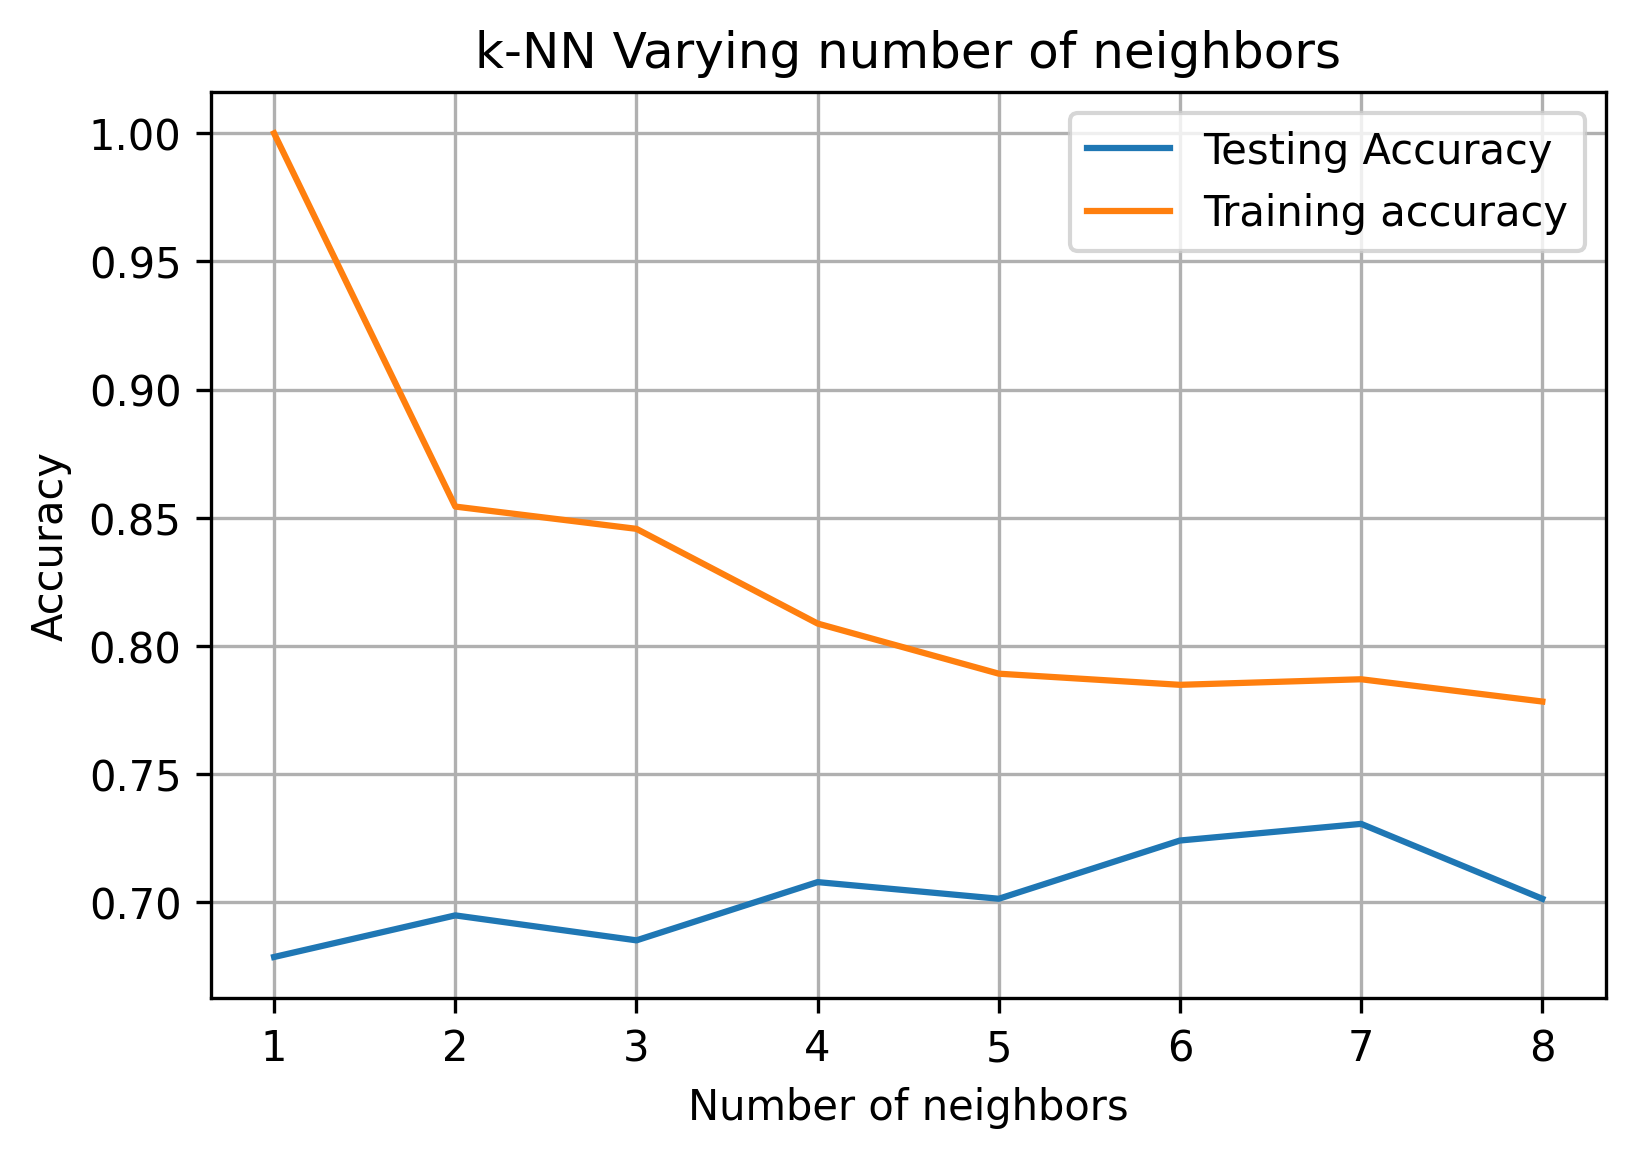

In [10]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()

As shown above, 7 neighbors seem to be a suitable choice. So, let's setup a knn classifier with only $k=7$ neighbors.

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)

Fit the model.

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

It is always a good manner to gather some score metrics.

In [13]:
knn.score(X_test,y_test)

0.7305194805194806

Import `confusion_matrix`

In [14]:
from sklearn.metrics import confusion_matrix

Let's make some predictions using the classifier we built earlier.

In [15]:
y_pred = knn.predict(X_test)

In [16]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

A fancy way to display the confusion matrix, is to use the `crosstab` method.

In [17]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


By importing `classification_report`, we can get some insights on how the model behaves.

In [18]:
from sklearn.metrics import classification_report

As a reminder, **F1-Score**, **Accuracy**, **Recall** and **Precision** are calculated as follow:
$$f1-\text{score} \;=\; \dfrac{2}{\dfrac{1}{\text{Recall}}+\dfrac{1}{\text{Precision}}}$$
$f1-\text{score}$ denotes the *Harmonic Mean of Recall \& Precision*
$$\text{Accuracy} \;=\; \dfrac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+\text{FN}}$$
It denotes the ratio of how much we got right over all cases. Recall, on the other hand, designates the ratio of how much positives do we got right over all actual positive cases.
$$\text{Recall} \;=\; \dfrac{\text{TP}}{\text{TP}+\text{FN}}$$
Precision, at last, is how much positives we got right over all positive predictions. It is given by:
$$\text{Precision} \;=\; \dfrac{\text{TP}}{\text{TP}+\text{FP}}$$

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308

